<a href="https://colab.research.google.com/github/antontregub/labs/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [521]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [539]:
df = pd.read_csv('winequality_white.csv')
df = df.replace('?', np.NaN)

In [523]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [524]:
df.shape

(4898, 12)

Task 2

In [525]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [526]:
df = df.dropna()

In [527]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [540]:

df['fixed acidity'] = pd.Categorical(df['fixed acidity'])
df['volatile acidity'] = pd.Categorical(df['volatile acidity'])
df['citric acid'] = pd.Categorical(df['citric acid'])
df['residual sugar'] = pd.Categorical(df['residual sugar'])
df['chlorides'] = pd.Categorical(df['chlorides'])
df['free sulfur dioxide'] = pd.Categorical(df['free sulfur dioxide'])
df['total sulfur dioxide'] = pd.Categorical(df['total sulfur dioxide'])
df['density'] = pd.Categorical(df['density'])
df['pH'] = pd.Categorical(df['pH'])
df['alcohol'] = pd.Categorical(df['alcohol'])
df['quality'] = pd.Categorical(df['quality'])

Task 3

In [529]:
df_for_viz = df.copy()
for column in df_for_viz.select_dtypes(include='category').columns:
    df_for_viz[column] = df_for_viz[column].cat.codes

All-vs-All correlation

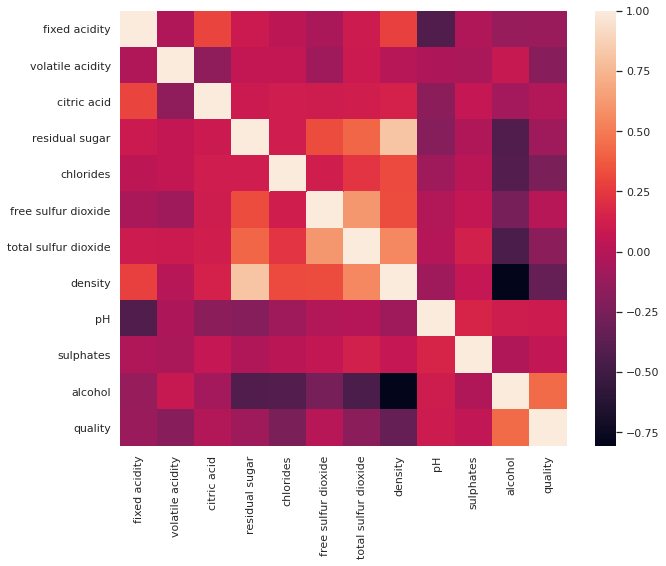

In [530]:
plt.figure(figsize=(10,8))
sns.heatmap(df_for_viz.corr())



```
# Distribution plots
```



In [531]:
df1 = pd.read_csv('winequality_white.csv')
df1 = df1.replace('?', np.NaN)
df1['fixed acidity'] = pd.Categorical(df1['fixed acidity']).as_ordered()
df1['volatile acidity'] = pd.Categorical(df1['volatile acidity']).as_ordered()
df1['citric acid'] = pd.Categorical(df1['citric acid']).as_ordered()
df1['residual sugar'] = pd.Categorical(df1['residual sugar']).as_ordered()
df1['chlorides'] = pd.Categorical(df1['chlorides']).as_ordered()
df1['free sulfur dioxide'] = pd.Categorical(df1['free sulfur dioxide']).as_ordered()
df1['total sulfur dioxide'] = pd.Categorical(df1['total sulfur dioxide']).as_ordered()
#df1['density'] = pd.Categorical(df1['density']).as_ordered()
#df1['pH'] = pd.Categorical(df1['pH']).as_ordered()
df1['alcohol'] = pd.Categorical(df1['alcohol']).as_ordered()
df1['quality'] = pd.Categorical(df1['quality']).as_ordered()



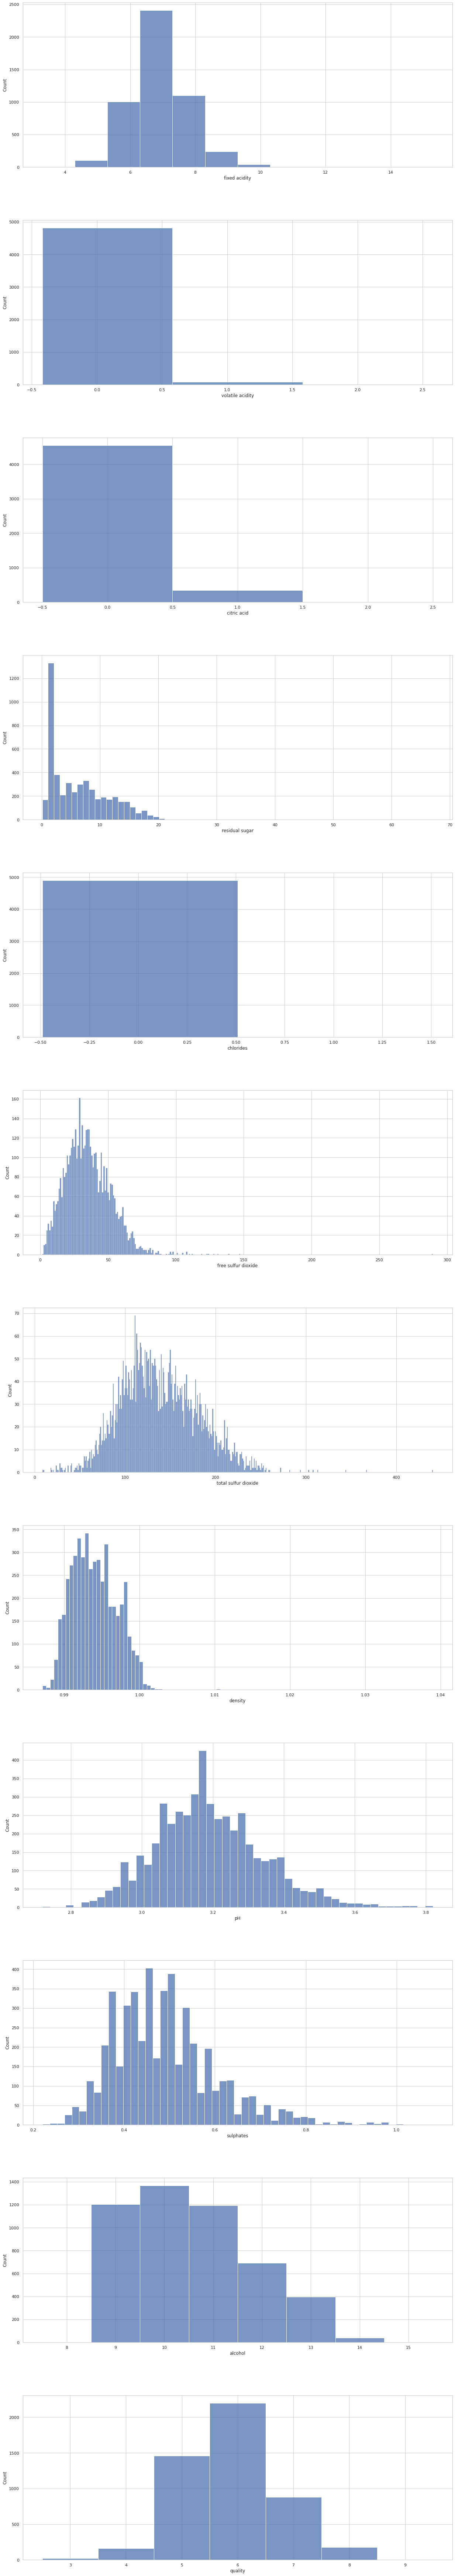

In [532]:
fig, axes = plt.subplots(nrows=12, ncols=1,figsize=(20,100))
fig.tight_layout(pad=10.0)
ax_iter = iter(axes.flat)
for column in df1.columns:
    ax = next(ax_iter)
    a = sns.histplot(df1[column],ax=ax)

Boxplots conditioned on label

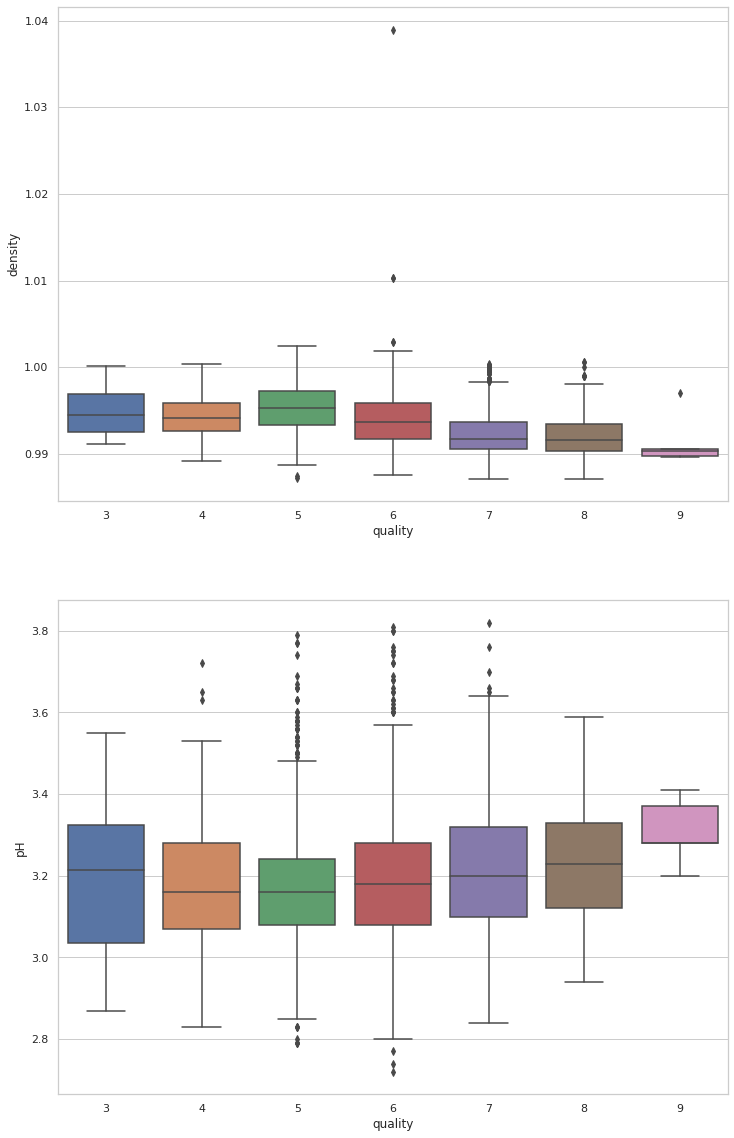

In [533]:
df=df.head()
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12,20))
ax_iter = iter(axes.flat)
for column in [ 'density', 'pH']:
    ax = next(ax_iter)
    a = sns.boxplot(x='quality', y=column, data=df1,ax=ax)

In [506]:
df.dtypes

fixed acidity           category
volatile acidity        category
citric acid             category
residual sugar          category
chlorides               category
free sulfur dioxide     category
total sulfur dioxide    category
density                 category
pH                      category
sulphates                float64
alcohol                 category
quality                 category
dtype: object

In [541]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

One-Hot encoding

In [542]:
for column in df.select_dtypes(include='category').columns:
    if column=='quality':
        continue
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)],axis=1)
    df.drop([column],axis=1, inplace=True)

In [543]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality',axis=1), df['quality'].cat.codes, test_size=0.2, random_state=42)

Numerical features scaling

In [544]:
for column in df.select_dtypes(include='int64').columns:
    scale = StandardScaler().fit(X_train[[column]])
    X_train[[column]] = scale.transform(X_train[[column]])
    X_test[[column]] = scale.transform(X_test[[column]])

KNN

In [ ]:
n_neighbors = list(range(10,15))
hyperparameters = dict(n_neighbors=n_neighbors)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=3, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   48.0s


In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

Decision Tree

In [ ]:
max_depth = [None,5,10,15]
hyperparameters = dict(max_depth=max_depth)
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, hyperparameters, cv=3, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

In [ ]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print('Score:', dtc.score(X_test, y_test))
print(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
import graphviz
dot_data = export_graphviz(dtc, out_file=None, 
                                filled=False)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
X_train.columns

SVM

In [ ]:
c = [0.1, 1, 2]
gamma = [0.1, 0.5]
kernel = ['rbf']
hyperparameters = dict(C=c, gamma=gamma, kernel=kernel)
svc = SVC()
clf = GridSearchCV(svc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])

In [ ]:
svc = SVC(C=2, kernel='rbf', gamma=0.1)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [ ]:
svc.score(X_test, y_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

Random Forest

In [ ]:
n_estimators = [5, 10, 100, 200, 500]
max_depth = [None, 5, 10,15,20,25]
min_samples_split = [0.1,0.25,0.5,1,2]
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=2)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

 AdaBoost

In [ ]:
n_estimators = [10, 50, 100, 500]
learning_rate = [0.1, 0.5, 1, 2, 5, 10]
algorithm = ['SAMME', 'SAMME.R']
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)
abc = AdaBoostClassifier()
clf = GridSearchCV(abc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])

In [ ]:
abc = AdaBoostClassifier(n_estimators=500, learning_rate=1, algorithm='SAMME.R')
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
abc.score(X_test, y_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

Gradient Boost

In [ ]:
learning_rate = [0.01, 0.1, 0.5]
n_estimators = [100, 250, 500]
max_depth = [3, 5, 7]
hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
gbc.score(X_test, y_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

Best model by f1-score - GradientBoostingClassifier¶

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))